## Angle-Dependence Experiment Data Analysis using Python
This notebook provides demonstrations and some documentation of the functionalities available in the file `analysis.py`.

We begin by establishing the backend for displaying the graphics in Jupyter and calling the class `Transducer` from `analysis`, as well as importing `numpy` and the `matplotlib` plotting library. The function `clean` from `clean_csv.py` will load `.csv` data from the oscilloscope and remove a number of rows from the beginning of the data, then write the data to a new subdirectory named `clean`.

In [1]:
%matplotlib inline

https://ipython.readthedocs.io/en/stable/interactive/plotting.html
https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb

In [2]:
from analysis import Transducer
from clean_csv import clean
import numpy as np
import matplotlib.pyplot as plt

We use two sets of data from the angle-dependence experiment - one for a flat transducer and one for a focused transducer with a focal depth of 3 inches. Their respective directories are `C:\Users\dionysius\Desktop\PURE\may28\FLAT` and `C:\Users\dionysius\Desktop\PURE\may28\FOC`. In python, they are written as `C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FLAT` and `C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FOC`.

We clean this data by calling the function `clean(mypath, skip)` for each directory. The path is passed as a string into `mypath` and the number of rows to remove is passed into `skip` (optional parameter, default is 2).

In [3]:
# not passing the skip parameter yields a default skip=2, but you can explicitly pass the parameter as well
clean("C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FLAT")
clean("C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FOC", skip=2);

Cleaning done -->  C:\Users\dionysius\Desktop\PURE\may28\FLAT\clean
Cleaning done -->  C:\Users\dionysius\Desktop\PURE\may28\FOC\clean


We initialize the path variables which leads to the directory containing the `.csv` files obtained from the scope. Instantiate Transducer objects with the parameters `mypath` and `name` - the directory path (of headerless `.csv` files) and the name of the set of signals. 

In [4]:
flat_path = 'C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FLAT\\clean'
foc_path = 'C:\\Users\\dionysius\\Desktop\\PURE\\may28\\FOC\\clean'
flat = Transducer(flat_path, "FLAT_15cm")
foc = Transducer(foc_path, "FOC_15cm")

The methods available for a Transducer object are listed as follows, with the optional parameters explicitly equated to their default values.

| Class Method  | Description  |
|:---| ---:|
| `Transducer.write_all()`  |  writes all figures to files located in subfolders of the main directory |
| `Transducer.display_all()`  | displays all figures to this notebook   |
| `Transducer.graph_total(i='all', SAVE=False, DISPLAY=True)`  | displays the peak voltage of the first reflected wave |
| `Transducer.graph_h(i='all', SAVE=False, DISPLAY=True)`   | displays the hilbert envelope of the first reflected wave  |
| `Transducer.graph_signal(i='all', SAVE=False, DISPLAY=True)`   | displays the entire signal and the identified peaks  |

| Parameter | Description |
| :--- | ---: | ---: |
| `i` | index/indices of signal selected (`<int>`, `<lst>`, or `'all'`)  |
| `SAVE` | option to save figure(s) to file (`<bool>`) |
| `DISPLAY` | option to display figure(s) (`<bool>`) |

Say we want to view the graph that plots the peak voltage of the first reflected wave for every angle. We will need to call `Transducer.display_total()` to display it but without saving. 

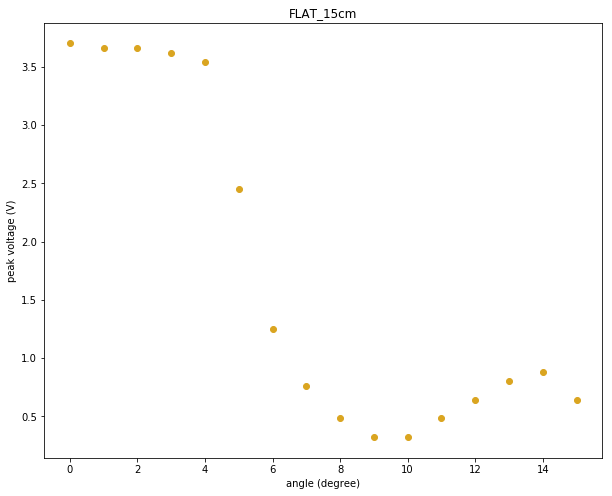

In [5]:
flat.graph_total(SAVE=False, DISPLAY=True);  # Jupyter automatically prints a representation of the last object in a cell

Next we may want to view the full signals for the first and last angles only. We will then call `Transducer.display_signal()` with the first and last index.

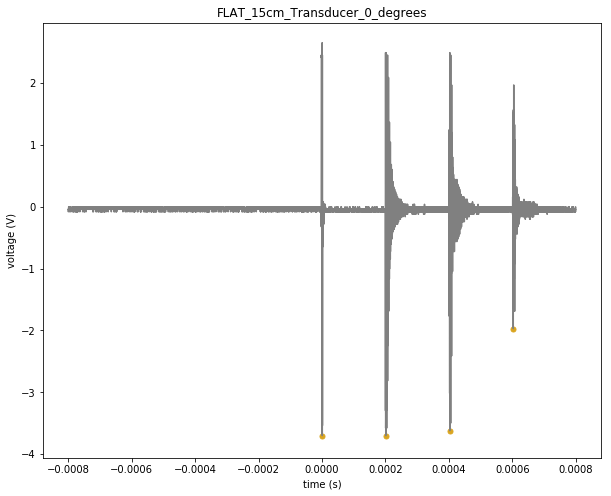

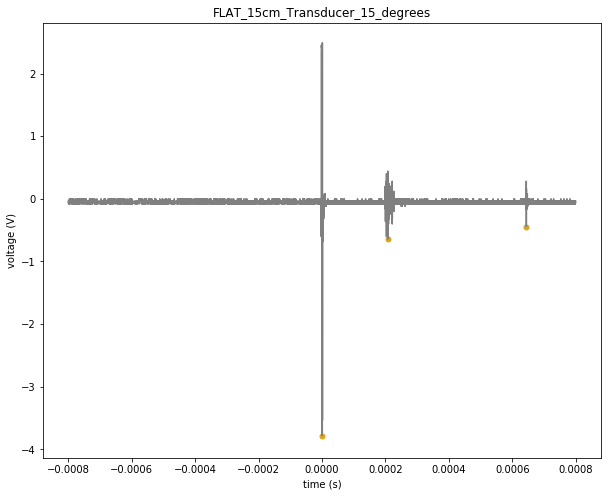

In [6]:
flat.graph_signal([0, -1]);

To compare the peak voltage graphs between the transducers, we need to plot it ourselves here.

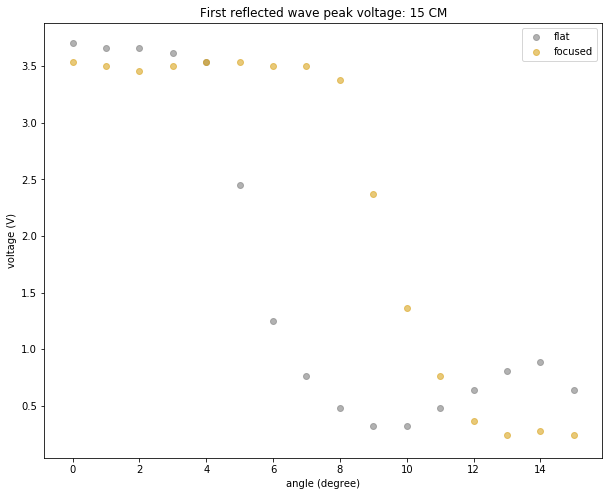

In [7]:
fig = plt.figure(figsize=[10,8])  # create the matplotlib figure
plt.scatter(flat.deg, flat.peak_totals, c='grey', alpha=.6, label='flat')  # plot the values for flat transducer
plt.scatter(foc.deg, foc.peak_totals, c='goldenrod', alpha=.6,label='focused')  # plot the values for focused transducer
plt.title('First reflected wave peak voltage: 15 CM')
plt.xlabel('angle (degree)')
plt.ylabel('voltage (V)')
plt.legend()
plt.show()